**Tika Company** is an e-commerce company in the USA. After 4 years, the CEO decided to hire a Data Analyst to build the **'Let Data Decide'** culture in the company.

You are that one, your job is to discuss with the Sale Department - Robert to do the analyze work. Use your data analytical skill to answer these following questions and present to Robert.

1\. What is sales, profit over 4 years?  
2\. Profit over Catergory?  
3\. Realtionship between Discount and Quanity?  
4\. Profit over Segment?  
5\. Which Segment is top 1 and specify their locations?  
6\. Which Category did they buy? What is the quantity?

\-------------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Read files
filename = 'Sample_Superstore.xlsx'
rawdata =  pd.read_excel(filename,sheet_name='Raw')
dim_shipmode =  pd.read_excel(filename,sheet_name='Dim_ShipMode')
dim_product =  pd.read_excel(filename,sheet_name='Dim_Product')
dim_shipcode =  pd.read_excel(filename,sheet_name='Dim_Ship_code')
dim_customer =  pd.read_excel(filename,sheet_name='Dim_customer')
people =  pd.read_excel(filename,sheet_name='People')

In [26]:
# Combine dataset
df = rawdata.merge(dim_shipmode,on=['Ship Mode ID'],how="left")
df = df.merge(dim_product,on=['Product ID'],how="left")
df = df.merge(dim_shipcode,on=['Postal Code'],how="left")
df = df.merge(dim_customer,on=['Customer ID'],how="left")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10372 entries, 0 to 10371
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10372 non-null  int64         
 1   Order ID       10372 non-null  object        
 2   Order Date     10372 non-null  datetime64[ns]
 3   Ship Date      10372 non-null  datetime64[ns]
 4   Ship Mode ID   10372 non-null  int64         
 5   Customer ID    10372 non-null  object        
 6   Postal Code    10372 non-null  object        
 7   Product ID     10372 non-null  object        
 8   Sales          10372 non-null  float64       
 9   Quantity       10372 non-null  int64         
 10  Discount       10372 non-null  float64       
 11  Profit         10372 non-null  float64       
 12  Ship Mode      10372 non-null  object        
 13  Category       10372 non-null  object        
 14  Sub-Category   10372 non-null  object        
 15  Product Name   1037

In [27]:
df.drop(columns = ['Row ID','Ship Mode ID','Customer ID','Product ID'],inplace=True)

In [28]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

In [29]:
df.head()

,Order ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode,Category,Sub-Category,Product Name,State,Region,Customer Name,Segment,Country,year,month
0,CA-2016-152156,2016-11-08,2016-11-11,42420,261.9600,2,0.00,41.9136,Second Class,Furniture,Bookcases,Bush Somerset Collection Bookcase,Kentucky,South,Claire Gute,Consumer,United States,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,42420,731.9400,3,0.00,219.5820,Second Class,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Kentucky,South,Claire Gute,Consumer,United States,2016,11
2,CA-2016-138688,2016-06-12,2016-06-16,90036,14.6200,2,0.00,6.8714,Second Class,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,California,West,Darrin Van Huff,Corporate,United States,2016,6
3,US-2015-108966,2015-10-11,2015-10-18,33311,957.5775,5,0.45,-383.0310,Standard Class,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Florida,South,Sean O'Donnell,Consumer,United States,2015,10
4,US-2015-108966,2015-10-11,2015-10-18,33311,22.3680,2,0.20,2.5164,Standard Class,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Florida,South,Sean O'Donnell,Consumer,United States,2015,10


### 1\. What is sales number, profit over 4 years?

In [30]:
sns.set_style('whitegrid')
colors = sns.color_palette('pastel')

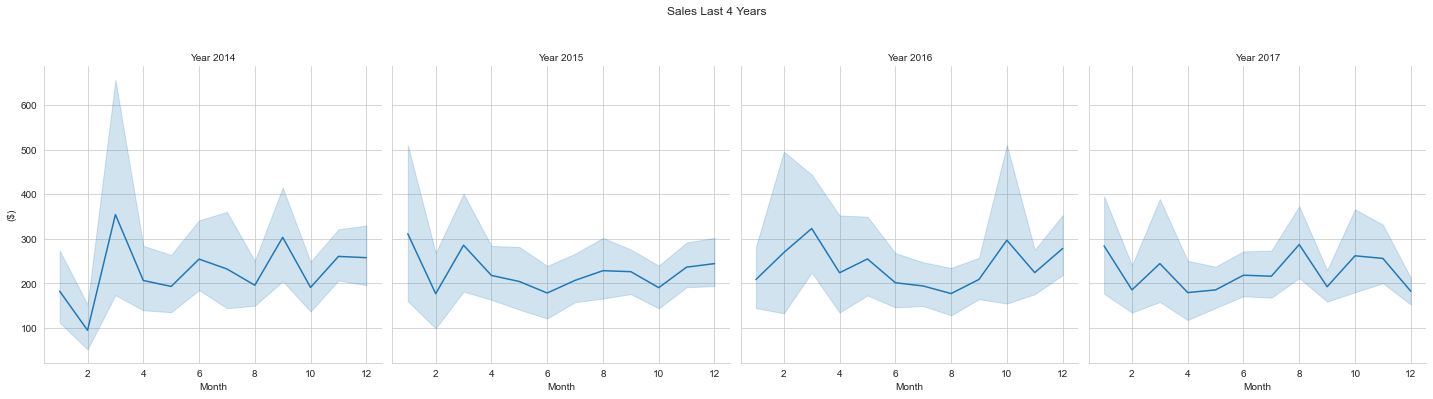

In [31]:
# Plot Sales
ax1 = sns.relplot(kind='line', data=df, x='month', y='Sales', col='year')

ax1.set(xlabel='Month', ylabel='($)')
ax1.fig.suptitle('Sales Last 4 Years', y=1.1)
ax1.set_titles("Year {col_name}")

plt.show()

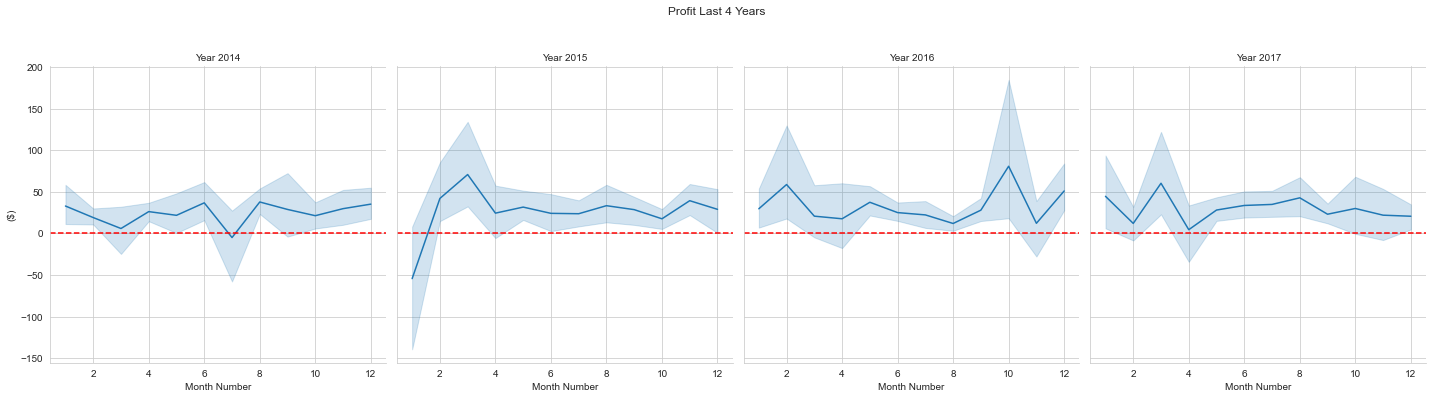

In [32]:
# Plot Profit
ax2 = sns.relplot(kind='line', data=df, x='month', y='Profit', col='year')
ax2.set(xlabel='Month Number', ylabel='($)')
ax2.fig.suptitle('Profit Last 4 Years', y=1.1)
ax2.set_titles("Year {col_name}")
axes = ax2.axes.flatten()
for ax in axes:
    ax.axhline(0, c='r', linestyle='--')
    
plt.show()

### 2\. Profit over catergory?

In [33]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

,Category,Profit
0,Furniture,20396.5900
1,Office Supplies,126692.2038
2,Technology,154147.3409


,Category,year,Profit
0,Furniture,2014,5892.2804
1,Furniture,2015,3380.0975
2,Furniture,2016,7755.4445
3,Furniture,2017,3368.7676
4,Office Supplies,2014,22840.4804
5,Office Supplies,2015,26217.9762
6,Office Supplies,2016,36541.4197
7,Office Supplies,2017,41092.3275
8,Technology,2014,23978.5883
9,Technology,2015,35517.9667


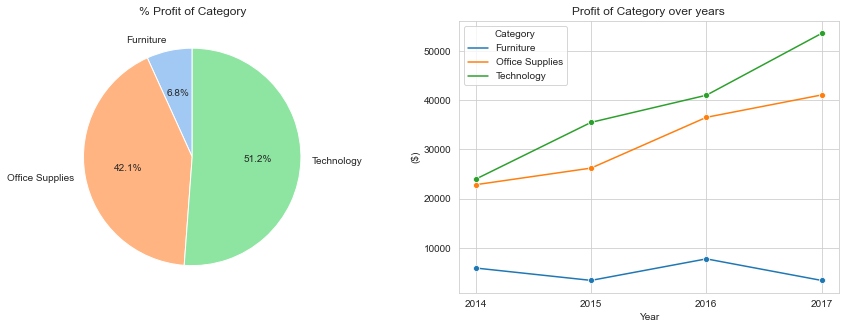

In [34]:
# 3 Categories -> Use Pie chart to show % and line chart to show change overtime
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (15,5))
# Axis 1 is pie chart
profit_cat_pie = df.groupby(by=['Category'], as_index=False)['Profit'].sum()
display(profit_cat_pie)
labels = profit_cat_pie['Category'].tolist()

ax1.pie(x = profit_cat_pie['Profit'], labels = labels, colors = colors, autopct='%.1f%%', startangle=90)
ax1.set_title('% Profit of Category')

# Axis 2 is line chart
profit_cat_line = df.groupby(by=['Category','year'], as_index=False)['Profit'].sum()
display(profit_cat_line)

ax2 = sns.lineplot(data=profit_cat_line, x='year', y='Profit', hue='Category', marker='o')
ax2.set(xticks=(2014,2015,2016,2017))
ax2.set(xlabel='Year', ylabel='($)', title = 'Profit of Category over years')

plt.show()

In [35]:
profit_cat_pie

,Category,Profit
0,Furniture,20396.5900
1,Office Supplies,126692.2038
2,Technology,154147.3409


### 3\. Realtionship between Discount and Quanity?

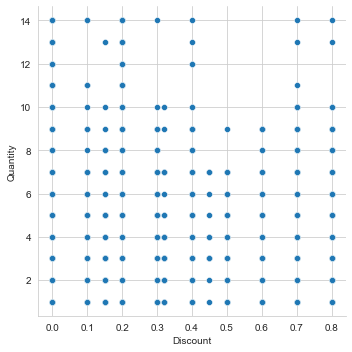

In [36]:
ax1 = sns.relplot(data = df, x = 'Discount', y = 'Quantity')

There is no relationship between Quantity and Discount

### 4\. Profit over Segment?

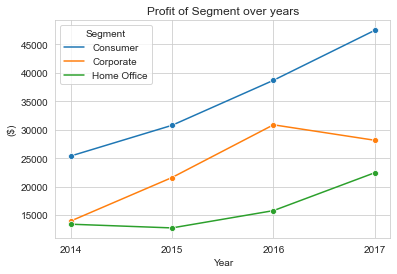

In [37]:
profit_segment = df.groupby(by=['Segment','year'], as_index=False)['Profit'].sum()
# Plot
ax = sns.lineplot(data=profit_segment, x='year', y='Profit', hue='Segment', marker='o')
ax.set(xticks=(2014,2015,2016,2017))
ax.set(xlabel='Year', ylabel='($)', title = 'Profit of Segment over years')

plt.show()

### 5\. Which Segment is top 1 and specify their locations?

,Region,Profit
0,Central,8666.3449
1,East,42384.7547
2,South,27934.7475
3,West,62944.5262


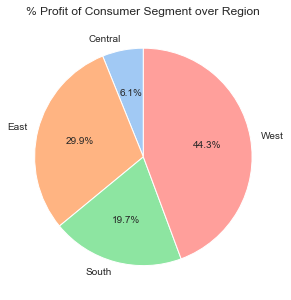

In [38]:
# Consumer is the segment who give the most profit.
df_cons = df.loc[df['Segment']=="Consumer"]

# Plot % by Region
consumer_region = df_cons.groupby(by=['Region'], as_index=False)['Profit'].sum()
display(consumer_region)

labels = consumer_region['Region'].tolist()
plt.figure(figsize = (15,5))
plt.pie(x = consumer_region['Profit'], labels = labels, colors = colors, autopct='%.1f%%', startangle=90)
plt.title('% Profit of Consumer Segment over Region')

plt.show()

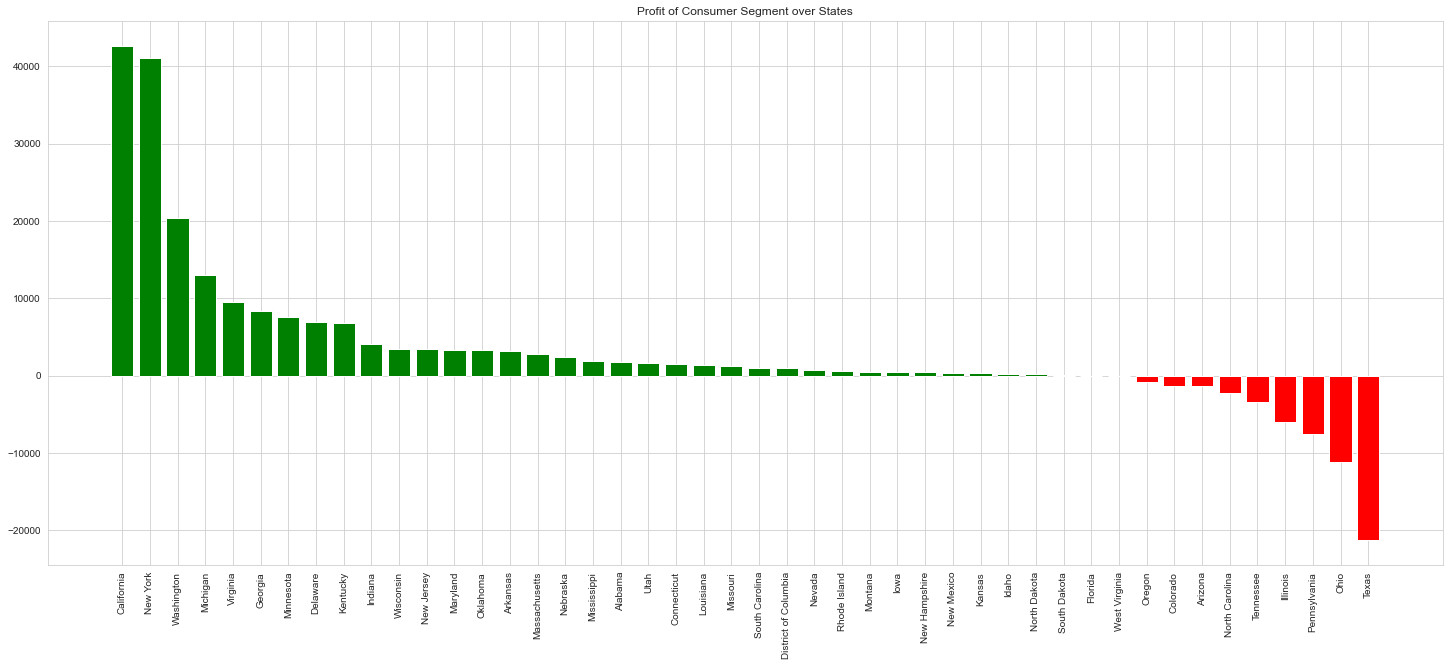

In [39]:
# Plot % by States
consumer_state = df_cons.groupby(by=['State'], as_index=False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l < 0:
            cols.append('red')
        else:
            cols.append('green')
    return cols

cols=pltcolor(consumer_state['Profit'])

plt.figure(figsize = (25,10))
plt.bar(consumer_state['State'], consumer_state['Profit'], color = cols)
plt.xticks(rotation = 90)
plt.title('Profit of Consumer Segment over States')

plt.show()

### 6\. Which Category did they buy? What is the quantity?

In [40]:
# Data group by Sub-Category
consumer_sub_ctgr = df_cons.groupby(by=['Sub-Category'], as_index=False)['Quantity'].sum().sort_values(by = 'Quantity', ascending= False)
# Add Cummulative Percentage
consumer_sub_ctgr['Percentage'] = consumer_sub_ctgr['Quantity']/(consumer_sub_ctgr['Quantity'].sum())*100
consumer_sub_ctgr['Cummulate']  = consumer_sub_ctgr['Percentage'].cumsum()
consumer_sub_ctgr

,Sub-Category,Quantity,Percentage,Cummulate
3,Binders,3105,15.325765,15.325765
12,Paper,2744,13.543929,28.869694
9,Furnishings,1991,9.827246,38.696940
13,Phones,1757,8.672261,47.369200
0,Accessories,1680,8.292201,55.661402
14,Storage,1669,8.237907,63.899309
2,Art,1642,8.104640,72.003949
5,Chairs,1276,6.298124,78.302073
1,Appliances,919,4.536032,82.838105
10,Labels,715,3.529121,86.367226


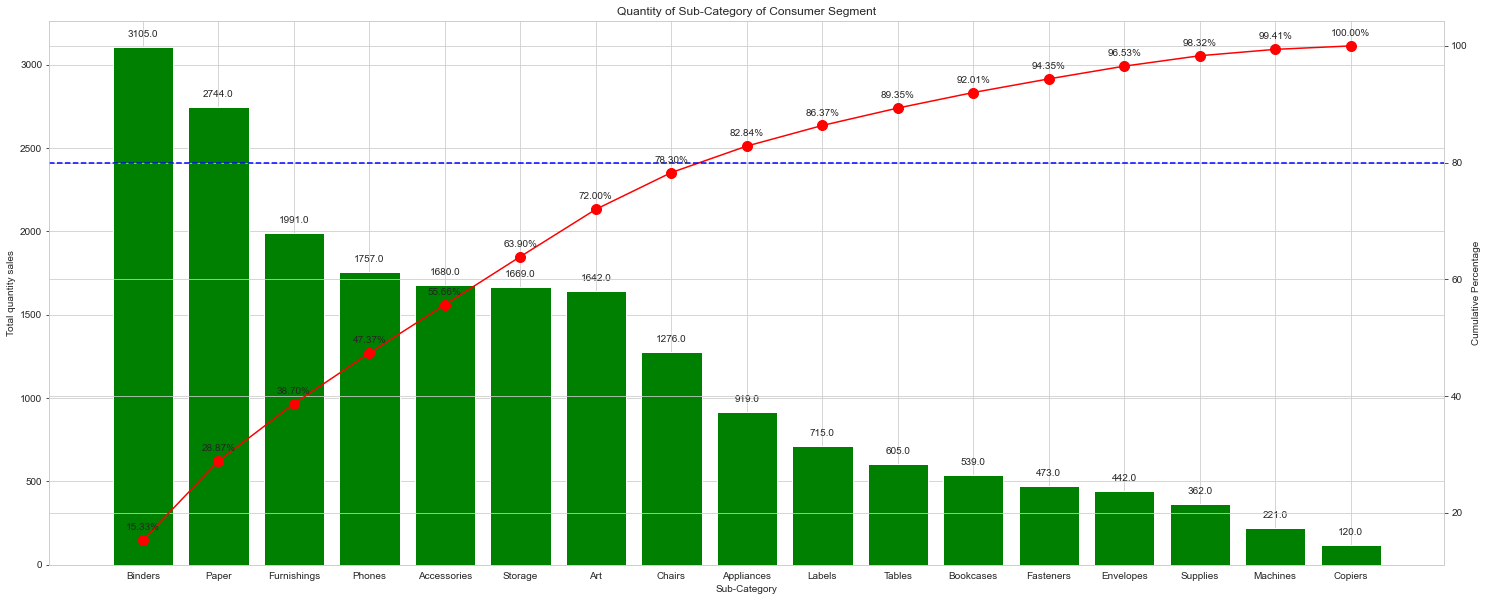

In [41]:
# Plot Pareto Chart
fig, ax1 = plt.subplots(figsize=(25,10))
xs = consumer_sub_ctgr['Sub-Category']
ys = consumer_sub_ctgr['Quantity']
yl = consumer_sub_ctgr['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = 'g')

for x,y in zip(xs,ys):

        label = "{:.1f}".format(y)

        ax1.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

ax1.set_title("Quantity of Sub-Category of Consumer Segment")
ax1.set_xlabel("Sub-Category")
ax1.set_ylabel("Total quantity sales")

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="r", marker="o", ms=10)

ax2.axhline(80, color="b", linestyle="--") # 80% line

#annotate for line
for x,y in zip(xs,yl):

        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

ax2.set_ylabel("Cumulative Percentage")

plt.show()